In [42]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from scipy.linalg import eigh_tridiagonal

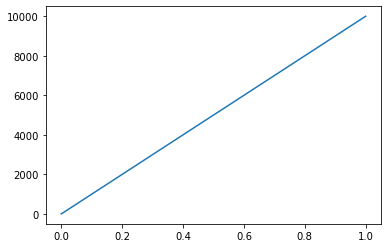

In [22]:
Nx = 301
dt = 1e-7
dx = 1/(Nx - 1)
x = np.linspace(0,1,Nx)
psi_0 = np.sqrt(2)*np.sin(np.pi*x)
L = 1

def V(x):
    mu,sigma = 1/2,1/20
    return x*1e4
    #return 1e4*np.exp(-(x-L*mu)**2/(2*L*sigma**2))
    #return -1e4*np.exp(-(x-L*mu)**2/(2*L*sigma**2))

plt.plot(x, V(x))
plt.show()

Text(0, 0.5, '$\\Psi(x)$')

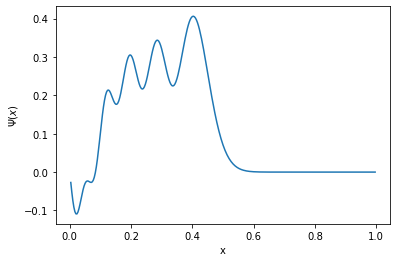

In [30]:
d = 1/dx**2 + V(x)[1:-1]
e = -1/(2*dx**2)*np.ones(len(d) - 1)
w,v = eigh_tridiagonal(d,e)



phi_of_x = np.zeros(len(v.T[0]))

for i in range(1,10):
    phi_of_x += v.T[i]

plt.plot(x[1:-1], phi_of_x)
plt.xlabel('x')
plt.ylabel('$\Psi(x)$')

In [24]:
E_j = w[0:70]
psi_j = np.pad(v.T[0:70], [(0,0),(1,1)], mode = 'constant')
cs = np.dot(psi_j, psi_0)

def psi_of_t(t):
    return np.dot(psi_j.T, cs*np.exp(-1j*E_j*t))

Text(0, 0.5, '$\\Psi^2(x,t)$')

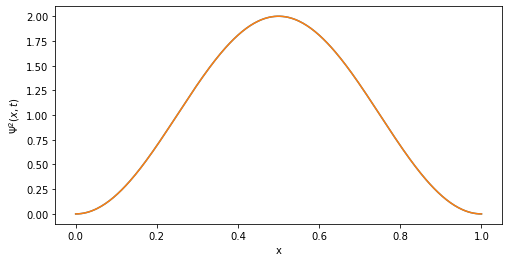

In [41]:
plt.figure(figsize=(8,4))
plt.plot(x,psi_0**2)
plt.plot(x,np.absolute(psi_of_t(1*dt))**2)

plt.xlabel('x')
plt.ylabel('$\Psi^2(x,t)$')

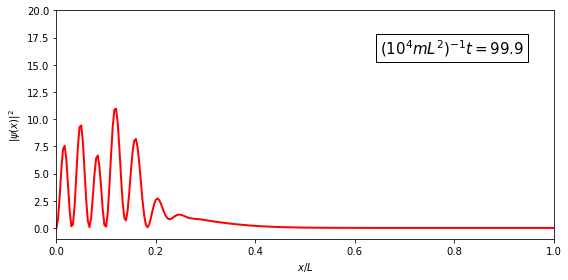

In [43]:
#takes about 2 minutes
def animate(i):
    ln1.set_data(x, np.absolute(psi_of_t(100*i*dt))**2)
    time_text.set_text('$(10^4 mL^2)^{-1}t=$'+'{:.1f}'.format(100*i*dt*1e4))
    
fig, ax = plt.subplots(1,1, figsize=(8,4))
#ax.grid()
ln1, = plt.plot([], [], 'r-', lw=2, markersize=8)
time_text = ax.text(0.65, 16, '', fontsize=15,
           bbox=dict(facecolor='white', edgecolor='black'))
ax.set_ylim(-1, 20)
ax.set_xlim(0,1)
ax.set_ylabel(r'$|\psi(x)|^2$')
ax.set_xlabel(r'$x/L$')
plt.tight_layout()
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('Phi.gif',writer='pillow',fps=50,dpi=200)

